In [3]:
import construction as cs
from ETN import *
from ETMM import *

%load_ext autoreload
%autoreload 2

In [4]:
# Parameters 
k = 3    # number of static snapshot used for the constructions of ETN
gap = 299   # temporal graph
label = False # if true, the loaded dataset is labeled
file_name = "InVS13" # name of the file

### Load the temporal graph as a sequence of static NetworkX graphs

In [6]:
data = cs.load_data("Datasets/"+file_name+".dat")
if label:
    meta_data = cs.load_metadata("Datasets/metadata/metadata_"+file_name+".dat")
else:
    meta_data = None
    
if label:
    graphs = cs.build_graphs(data,gap=gap,with_labels=label,meta_path="Datasets/metadata/metadata_"+file_name+".dat")
else:
    graphs = cs.build_graphs(data,gap=gap,with_labels=label)

### count ETN or LETN and store the result

In [7]:
S = count_ETN(graphs,k,meta=meta_data)
S = {k: v for k, v in sorted(S.items(), key=lambda item: item[1], reverse=1)}

store_etns(S,file_name,gap,k,label=label)

file stored in: 	res/LH10/ETNS/gap_299_k_3.json


In [8]:
# load etns 
SS = load_etns(file_name,gap,k,label=label)
assert(SS == S)

count 	 = 	 758
count 	 = 	 237
count 	 = 	 210
count 	 = 	 198
count 	 = 	 99
count 	 = 	 93


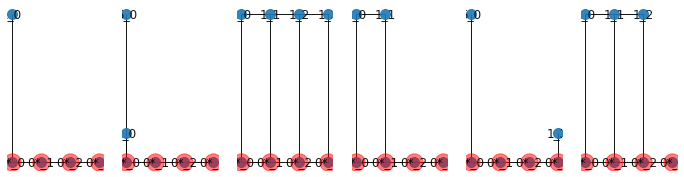

In [9]:
# plot 6 most frequent ETN
fig_per_row = 6
S_array = list(S.keys())
for i in range(0,6,fig_per_row):
    plt.figure(figsize=(12,3))
    for j in range(fig_per_row):
        plt.subplot(1,fig_per_row,j+1)
        print("count \t = \t",S[S_array[i+j]])
        draw_ETN(from_ETNS_to_ETN(S_array[i+j],k,meta_data),multiple=True)
    plt.show()

# Build Null models

In [10]:
def buil_nm(graphs,n,file):
    t = 0
    to_save = []
    f = open("null_models/"+file+"/"+file+"_"+str(n)+".txt", "a")
    for g in graphs:
        for e in g.edges():
            s = str(t)+" "+str(e[0])+" "+str(e[1])+"\n"
            f.write(s)
        t = t + gap + 1
    f.close()

In [11]:
seed = 10
n = 20
null_models = shuffle_graphs(graphs,n,seed)
print(len(null_models))

20


In [13]:
# store null models
c = 0
for graphs in null_models:
    buil_nm(graphs,c,file_name)
    c = c + 1

# Egocentric temporal motifs miner ETMM

In [14]:
# load precoputed etns
S = load_etns(file_name,gap,k,label)

In [15]:
# count etn in null models and store the results

counts = counts_ETN_null_models(null_models,S,k,label,meta_data,verbose=True)
store_etm_counts(counts,file_name,gap,k,label)

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
file stored in: 	res/LH10/ETM_counts/gap_299_k_3.json


In [16]:
tmp = load_etm_count(file_name,gap,k,label)
assert(tmp == counts)

# Apply statistical test

In [17]:
alpha=0.01
beta=0.1
gamma=10

ETM = get_ETM(counts,alpha,beta,gamma)

number of etns:	 4367 
number of etm: 	 48


count 	 = 	 210
count 	 = 	 198
count 	 = 	 93
count 	 = 	 78
count 	 = 	 77
count 	 = 	 50


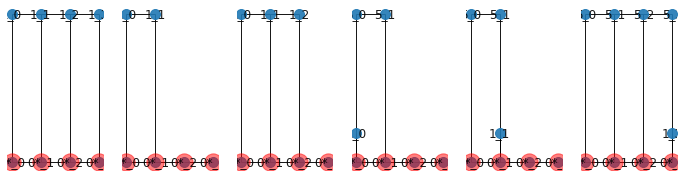

In [19]:
fig_per_row = 6
for i in range(0,fig_per_row,fig_per_row):
    plt.figure(figsize=(12,3))
    for j in range(fig_per_row):
        plt.subplot(1,fig_per_row,j+1)
        print("count \t = \t",ETM[i+j][1])
        draw_ETN(from_ETNS_to_ETN(ETM[i+j][0],k,meta_data),multiple=True)
    plt.show()